In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stats

In [3]:
df = pd.read_csv('./students.csv')

In [4]:
df.shape

(8239, 16)

In [5]:
df.head()

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


In [6]:
df['graduated'].nunique()

2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8239 entries, 1 to 8239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stud.id          8239 non-null   int64  
 1   name             8239 non-null   object 
 2   gender           8239 non-null   object 
 3   age              8239 non-null   int64  
 4   height           8239 non-null   int64  
 5   weight           8239 non-null   float64
 6   religion         8239 non-null   object 
 7   nc.score         8239 non-null   float64
 8   semester         8239 non-null   object 
 9   major            8239 non-null   object 
 10  minor            8239 non-null   object 
 11  score1           4892 non-null   float64
 12  score2           4892 non-null   float64
 13  online.tutorial  8239 non-null   int64  
 14  graduated        8239 non-null   int64  
 15  salary           1753 non-null   float64
dtypes: float64(5), int64(5), object(6)
memory usage: 1.1+ MB


In [8]:
df_graduate = df.query('graduated == 1')

In [9]:
df_graduate.head()

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
11,200803,"Lang, Mackenzie",Female,22,162,66.8,Other,1.04,4th,Economics and Finance,Environmental Sciences,62.0,61.0,1,1,45254.108021
13,354271,"Covar Orendain, Christopher",Male,23,185,84.6,Orthodox,1.00,4th,Environmental Sciences,Mathematics and Statistics,71.0,76.0,1,1,40552.790243
14,317812,"Lopez, Monique",Female,20,158,64.4,Catholic,2.50,6th,Environmental Sciences,Social Sciences,66.0,70.0,1,1,27007.030294
17,350040,"Hines, Haileigh",Female,22,156,61.7,Other,2.27,6th,Political Science,Biology,57.0,54.0,0,1,33969.159268
28,763393,"Woolsey, Bronson",Male,24,182,80.1,Protestant,1.09,5th,Economics and Finance,Social Sciences,61.0,73.0,1,1,50617.641870


In [10]:
major_salary = df_graduate.groupby(['major']).aggregate({'salary':'mean'})
major_salary

,salary
major,
Biology,47942.830314
Economics and Finance,49696.171910
Environmental Sciences,37652.678362
Mathematics and Statistics,48443.506902
Political Science,36390.273276
Social Sciences,32044.006106


In [11]:

unique_student_id = list(df_graduate['stud.id'].unique())

sampling_student_id = random.sample(unique_student_id, 500)



In [12]:
len(unique_student_id)


1753

In [13]:
sample_student_id = random.sample(unique_student_id,500)

sample_students = df_graduate[df_graduate['stud.id'].isin(sample_student_id)]

In [14]:
sample_students.shape

(500, 16)

In [15]:
# Taking interested variables i.e Salary and Major

sample_students = sample_students[['major', 'salary']]

In [16]:
sample_students.tail()

,major,salary
8154,Social Sciences,23039.801612
8174,Environmental Sciences,33472.281438
8182,Economics and Finance,64050.009259
8185,Social Sciences,33077.868705
8190,Biology,73980.214617


In [17]:
sample_students.groupby('major').count().reset_index()

,major,salary
0,Biology,96
1,Economics and Finance,84
2,Environmental Sciences,110
3,Mathematics and Statistics,84
4,Political Science,80
5,Social Sciences,46


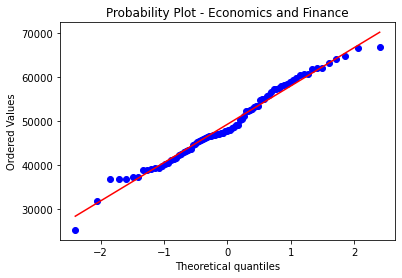

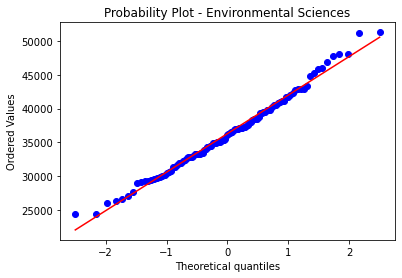

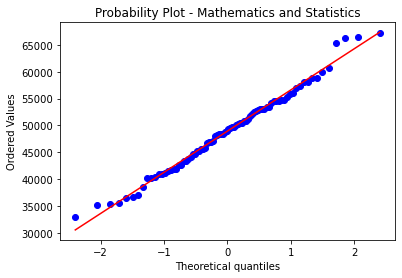

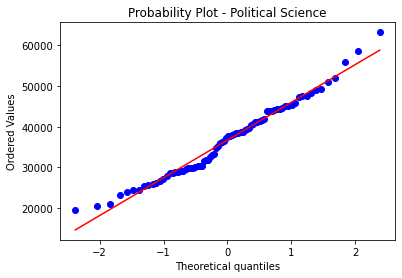

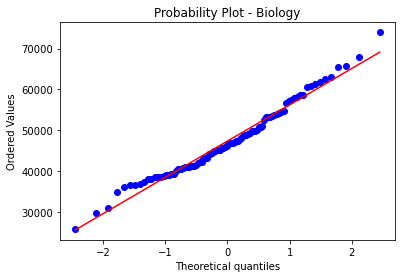

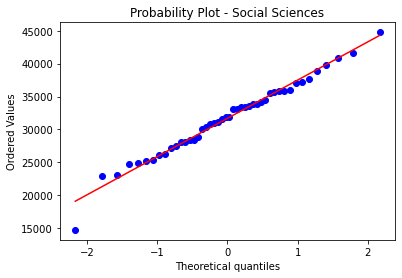

In [18]:

# VErifying if its a Normal Distribution or not
unique_majors = sample_students['major'].unique()
for major in unique_majors:
    stats.probplot(sample_students[sample_students['major'] == major]['salary'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [19]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = sample_students.groupby('major').std().max() / sample_students.groupby('major').std().min()
ratio

salary    1.620007
dtype: float64

> The ratio of the largest to the smallest sample standard deviation is 1.67. That is less than the threshold of 2. Thus, we conclude that the assumptions are fulfilled.

In [20]:
sample_students.groupby('major').std().idxmax()

salary    Political Science
dtype: object

## Null Hypothesis : Mean of all groups are equal 
## ALternate Hypothesis : Not all means are equal

## Test Statistic => **F** = MSTR/MSE -> equivalent to => **F**(c-1,n-c)

## Decision Rule : Reject Null Hypothesis when **F** > **F**($\alpha$,c-1,n-c)



In [21]:
degree_f_within_group = sample_students.shape[0] - sample_students['major'].nunique()
degree_f_within_group

494

In [22]:
degree_f_between_groups = sample_students['major'].nunique()-1
degree_f_between_groups

5

In [23]:
total_degree_of_freedom = sample_students.shape[0]-1


In [24]:
x_bar = sample_students['salary'].mean()
x_bar

42379.13613942113

In [25]:
help(stats.f.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.f_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



In [26]:
degree_f_between_groups

5

In [27]:
degree_f_within_group

494

In [28]:
alpha = 0.05
# HEre, this is is Two tail test; 
alpha /= 2
confidence_interval = 1-alpha
confidence_interval

f_critic = stats.f.ppf(confidence_interval,  degree_f_between_groups, degree_f_within_group)
f_critic

2.592178494905

In [29]:
SSTR = sample_students.groupby('major').count() * (sample_students.groupby('major').mean() - x_bar)**2

In [30]:
ss_between_groups = SSTR['salary'].sum()
ss_between_groups

21952777770.051502

In [31]:
SSE = (sample_students.groupby('major').count()-1) * sample_students.groupby('major').std() ** 2
ss_within_groups = SSE['salary'].sum()
ss_within_groups

30009292174.20435

In [32]:
ms_within_groups = ss_within_groups/degree_f_within_group
ms_between_groups = ss_between_groups/degree_f_between_groups

In [33]:
F = ms_between_groups/ms_within_groups
F

72.27542826036664

In [34]:
if F > f_critic:
    print("NUll Hypothesis is rejected!!!")
else :
    print("Failed to reject NULL Hypothesis")

NUll Hypothesis is rejected!!!
